### Project Title: Iris Species Classification

This project focuses on classifying iris species using a dataset containing 4 features and 150 entries. The features include sepal length, sepal width, petal length, and petal width. The target variable, 'Species,' represents the type of iris flower. The goal is to use machine learning models to accurately classify the species based on these features.

In [1]:
# import libraries 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Iris.csv')
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Drop unnecessary column

df.drop(columns = 'Id', inplace = True)

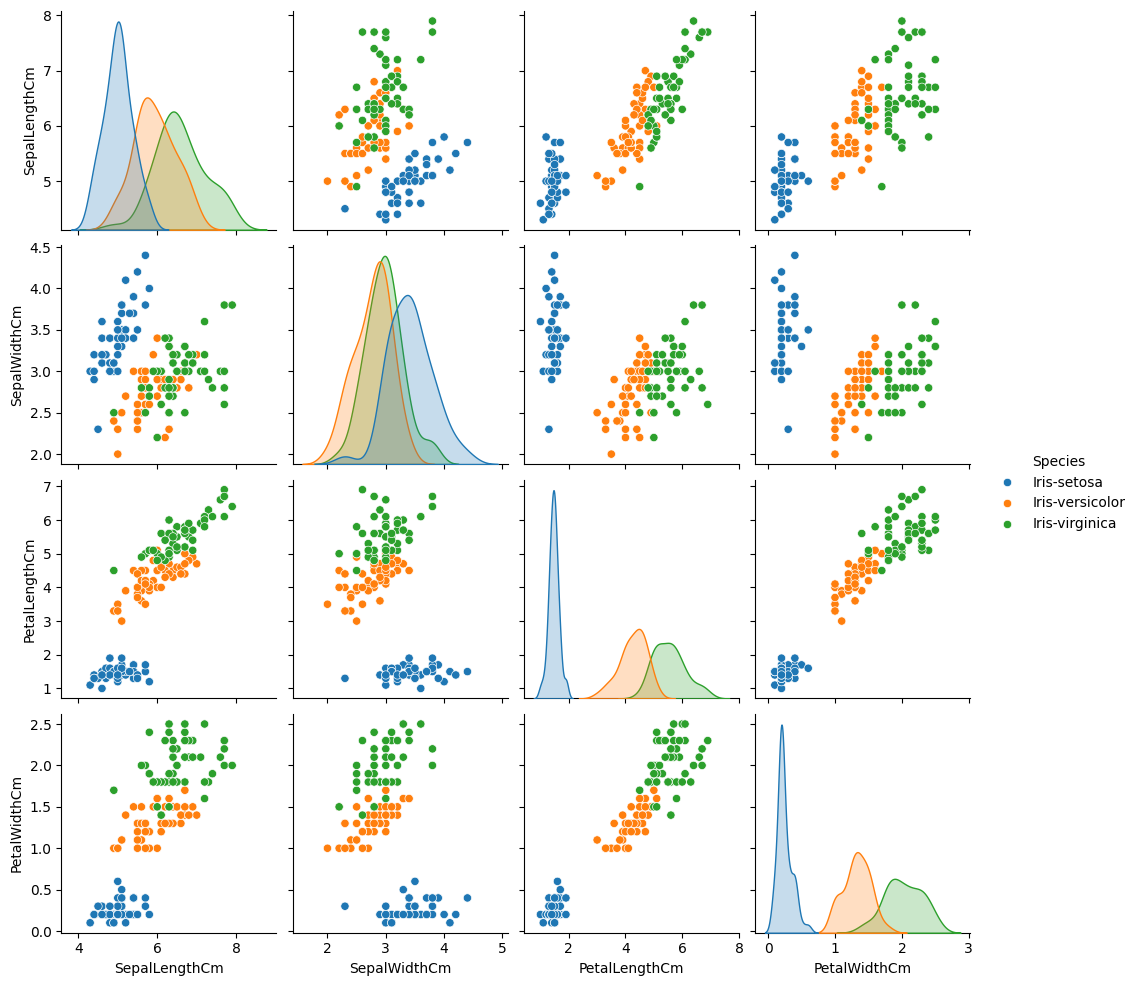

In [4]:
# create a pairplot to visualize the data

sns.pairplot(df, hue = 'Species')
plt.show()

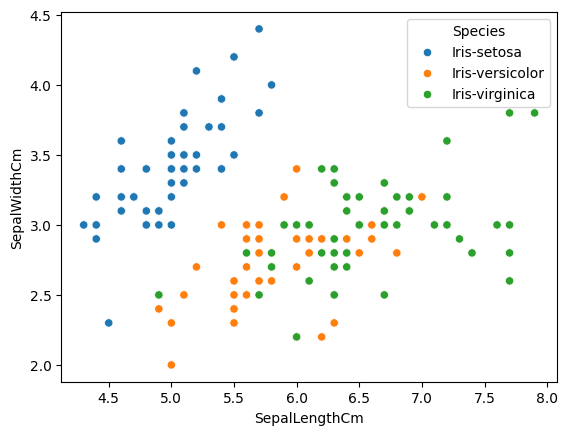

In [5]:
# create a scatterplot to visualize the data

sns.scatterplot(x = 'SepalLengthCm', y = 'SepalWidthCm', hue = 'Species', data = df)
plt.show()

In [6]:
# split the data into features and target

x= df.drop(["Species"], axis = 1)
y= df["Species"]

In [7]:
# split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [8]:
# create a pipeline

pipeline = make_pipeline(
    StandardScaler(), DecisionTreeClassifier())


In [9]:
# create a parameter grid

param_grid = {
    'decisiontreeclassifier__criterion': ['gini', 'entropy', 'log_loss'],
    'decisiontreeclassifier__max_depth':  [3, 4, 5], 
    'decisiontreeclassifier__min_samples_split':  [2, 5, 10]
    }

In [10]:
# create a grid search

grid_search = GridSearchCV(pipeline, param_grid, cv = 5, scoring='accuracy')

In [11]:
# fit the grid search

grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             param_grid={'decisiontreeclassifier__criterion': ['gini',
                                                               'entropy',
                                                               'log_loss'],
                         'decisiontreeclassifier__max_depth': [3, 4, 5],
                         'decisiontreeclassifier__min_samples_split': [2, 5,
                                                                       10]},
             scoring='accuracy')

In [12]:
# get the best parameters and best score

best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

In [13]:
# print the best parameters and best score

print(f"Best parameters: {best_parameters}")
print(f"Best Cross-Validation Accuracy : {best_score*100:.2f}%")

Best parameters: {'decisiontreeclassifier__criterion': 'gini', 'decisiontreeclassifier__max_depth': 4, 'decisiontreeclassifier__min_samples_split': 2}
Best Cross-Validation Accuracy : 95.00%


In [14]:
# get the predicted values

y_pred = grid_search.best_estimator_.predict(x_test)
y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [15]:
# get the accuracy score

Accuracy = accuracy_score(y_test, y_pred)

In [16]:
# print the accuracy

print(f"Accuracy: {Accuracy*100:.2f}%")

Accuracy: 100.00%


In [17]:
# Use the trained model to predict the class of a new, unseen data point
new_data = [[5.1, 3.5, 1.4, 0.2]]  # New data point to be classified
predicted_class = grid_search.predict(new_data)  # Predict the class
print(predicted_class)  # Print the predicted class label

['Iris-setosa']


In [18]:
# Extract the best-performing Decision Tree Classifier model from the grid search
best_tree = grid_search.best_estimator_.named_steps['decisiontreeclassifier']


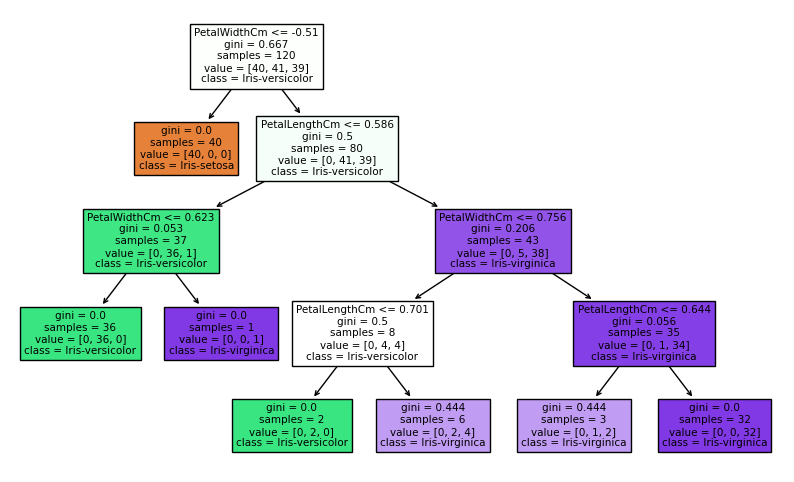

In [19]:
# Visualize the Decision Tree

plt.figure(figsize=(10, 6))
plt.title("Decision Tree Visualization")
tree.plot_tree(best_tree, feature_names=x.columns, class_names = y.unique(), filled=True)
plt.show()

In [20]:
# Create a LabelEncoder object to convert categorical target variable to numerical values
le = LabelEncoder()

# Fit and transform the 'Species' column to numerical values
y = le.fit_transform(df["Species"])

# Split the preprocessed data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(
    df.drop("Species", axis=1),  # Features
    y,  # Target variable
    test_size=0.2,  # Proportion of data for testing
    random_state=42  # Seed for reproducibility
)

In [21]:
# Convert the training data to NumPy arrays for efficient computation
x_train_array = np.array(x_train)  # Features
y_train_array = np.array(y_train).astype(np.int32)  # Target variable (integer type)

x_train_array = np.array(x_train)
y_train_array = np.array(y_train).astype(np.int32)

In [22]:
# Fit the pipeline to the training data
pipeline.fit(x_train_array[:, :2], y_train_array)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [23]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


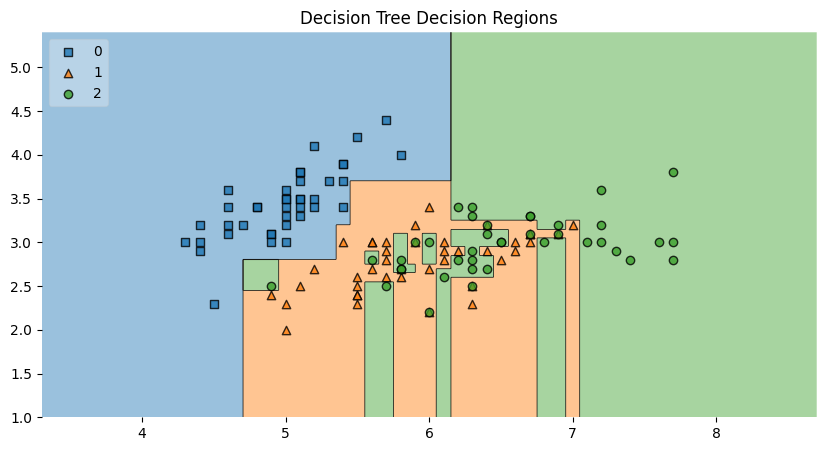

In [24]:
# Plot decision regions of the trained Decision Tree Classifier on the training data


plt.figure(figsize=(10, 5))
plot_decision_regions(x_train_array[:, :2], y_train_array, clf=pipeline, legend=2)
plt.title('Decision Tree Decision Regions')
plt.show()

# Result Interpretation

#### The Decision Tree Classifier performed well with 95% cross-validation accuracy and 100% test accuracy, indicating it's a good model for this task with optimal hyperparameters.The model is able to learn the underlying patterns in the data and make accurate predictions on new, unseen data.